# Housing Pricing Model Project

Learning Project to create a predictive housing price model with python based on existing house pricing data

## Step 1 - import packages

For the project we will be using `pandas`, `numpy`, `matplotlib`, and `seaborn` python packages

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## Step 2 - Load the data into a DataFrame

In [38]:
data = pd.read_csv("./housing.csv")

## Step 3 - Explore the data

- Get a Quick view of the data - The Code below returns the first few rows of the data. We do this to get see the structure of the data

In [40]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


- Check for Missing Values: This step helps us identify if any columns have missing entries, which we might need to handle

In [42]:
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

- Statistical Summary: This gives an overview of the dataset's numberical features

In [44]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


- Visualize Relationships: It's helpful to look at the correlations between features and the target variable (price) to see what might be useful for prediction. Use this heatmap to show correlations

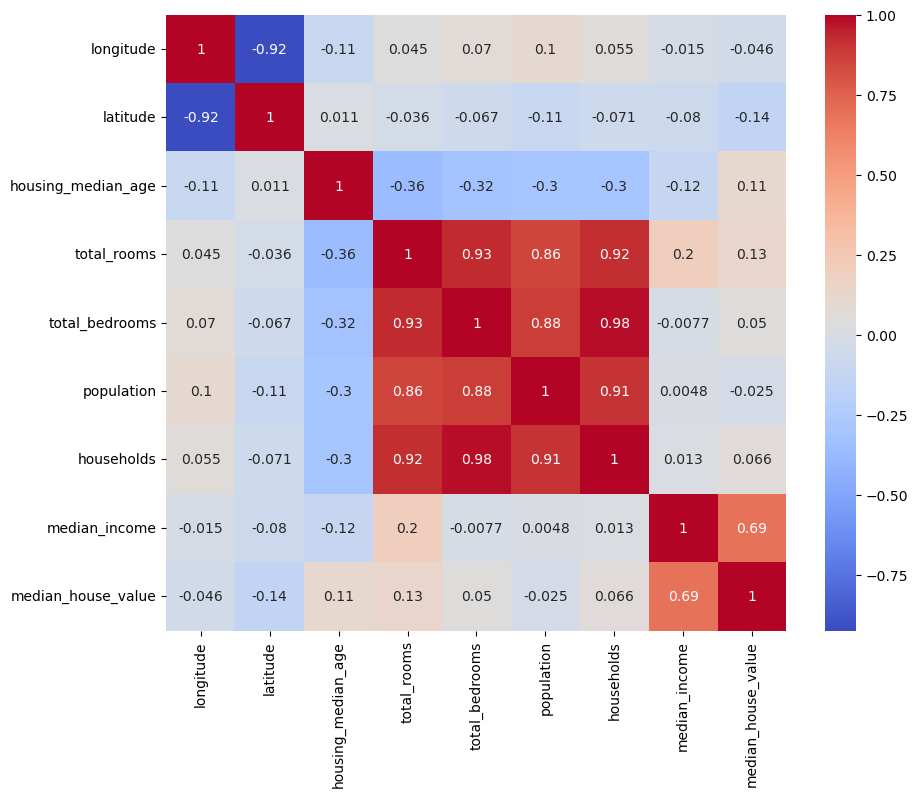

In [48]:
# Select only numberic columns for the correlation matrix
numeric_data = data.select_dtypes(include=[np.number])

# Plot the heatmap with only numeric columns
plt.figure(figsize=(10,8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.show()

# Step 4: Prepare the Data for Modeling

Based on the heatmap, we choose the columns that seem most relevant for predicting house prices. These are:
- Total Rooms: The `total_rooms` column
- Total BedRooms: The `total_bedrooms` column
- Population: The `population` column
- Households: The `households` column
And we set those columns to the `X` axis, and `price` to the `Y` axis

In [73]:
X = data[['total_rooms', 'total_bedrooms', 'population', 'households']]
y = data['median_house_value']

Train-Test Split: Split the data to assess the models performance

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Step 5: Train a Linear Regression Model

1. Initialize and Train the Model

In [77]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

2. Make Predictions

In [81]:
X_test.isnull().sum()

total_rooms         0
total_bedrooms    207
population          0
households          0
dtype: int64

In [83]:
X_train.describe()

,total_rooms,total_bedrooms,population,households
count,16512.000000,16512.000000,16512.000000,16512.000000
mean,2642.004784,538.496851,1426.453004,499.986919
std,2174.646744,419.007096,1137.056380,380.967964
min,2.000000,1.000000,3.000000,1.000000
25%,1454.000000,296.750000,789.000000,280.000000
50%,2129.000000,437.000000,1167.000000,410.000000
75%,3160.000000,647.000000,1726.000000,606.000000
max,39320.000000,6445.000000,35682.000000,6082.000000


In [85]:
X_test.describe()

,total_rooms,total_bedrooms,population,households
count,4128.000000,3921.000000,4128.000000,4128.000000
mean,2610.796269,535.233104,1421.571705,497.750727
std,2209.359101,431.299704,1114.023136,387.770570
min,6.000000,2.000000,8.000000,2.000000
25%,1420.000000,294.000000,781.000000,278.000000
50%,2110.000000,428.000000,1160.000000,406.000000
75%,3099.250000,643.000000,1722.000000,598.000000
max,37937.000000,5471.000000,16122.000000,5189.000000


In [79]:
y_pred = model.predict(X_test)

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values